## LoPy4 Battery Tests
I wanted to test my LoPy4 battery usage under various usage sceanios. All tests were sending 2 Lorawan uploads (Location and sensor data) and then performing a deepsleep for a range of seconds (10,20,60,300,1200). The Scenarios were run until my power meter had seen at least 30mAh of current used and then the average current use per hour was recorded. The measurements were made using a [usb power meter](https://www.amazon.com/gp/product/B07X3HST7V/ref=ppx_yo_dt_b_asin_title_o04_s00?ie=UTF8&psc=1) , the measurements were made over enough time to get a reasonable amount of mAh's measured (at least 30mAh) and then the resulting time in hours divided into the total mAh to get a mAh value for one hour's power usage.

![USB Power meter](images/usb-meter.jpg "USB power meter")


The data and results, from these tests, are shown below.

### A: Pycom Expansion Board with LEDs
In this setup I am running the lopy4 board on the [pycom expansion board V3.1](https://docs.pycom.io/datasheets/expansionboards/expansion3/) . This expansion board has a LED on it that glow all the time (i.e. the USB LED) so will have some extra power draw even when the lopy4 is in deepsleep.

![Pycom Expansion Board V3](images/expv3.jpg "Expansion Board V3")

### B: Bread Board with LED
This setup I set up a minimal breadboard configuration so deepsleep should have power usage closer to my final version. In this set of measurements I am blinking the lopy4 LED in different colors and duration to indicate where the lopy4 is in the active lifecyple process i.e. Setup->Joining->Sending->Going to sleep . 

![Breadboard lopy4 with LED](images/breadLED.jpg "Breadboard lopy4 with LED")

### C: Bread Board no LED
This setup I set up a minimal breadboard configuration so deepsleep should have power usage closer to my final version. I disable the lopy4 onboard LED (blinker) to find the minimum power usage. 

![Breadboard lopy4](images/bread.jpg "Breadboard lopy4")

### D: Pytrack V2 no LED
Looking at the boards available from pycom the [pytrack 2](https://pycom.io/product/pytrack-2-0-x/) looks like the board I will end up using for the ourLora project (already has gps on the board, sensor and IO headers and low deepsleep spec.) . This set of test are with that board and no LED to get what my ourLora projects' power usage will be.

![pytrack](images/pytrack.jpg "pytrack V2")




In [1]:
power_data = {
    "X" : [10,20,60,300,1200],
    "A": [26.748,17.784,9.288,1.908,0.48492],
    "B": [11.088,6.7005,2.682,1.1963,0.0923],
    "C": [0,0,0,0,0],
    "D": [0,0,0,0,0]
}

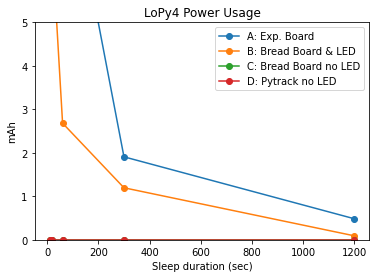

<Figure size 864x576 with 0 Axes>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
line1, = ax.plot(power_data["X"], power_data["A"], label='A: Exp. Board',marker='o')
line2, = ax.plot(power_data["X"], power_data["B"], label='B: Bread Board & LED',marker='o')
line3, = ax.plot(power_data["X"], power_data["C"], label='C: Bread Board no LED',marker='o')
line4, = ax.plot(power_data["X"], power_data["D"], label='D: Pytrack no LED',marker='o')
ax.set_ylabel('mAh')
ax.set_xlabel('Sleep duration (sec)')
ax.set_title('LoPy4 Power Usage')
ax.legend()
plt.ylim(top=5)
plt.ylim(bottom=0)
plt.figure(figsize=(12,8))
plt.show()



### Notes

I am still gathering the data for all these tests.

Also I will perform some direct current readings to validate some of these results. Be aware pycom also publishes data about deepsleep currents for most of their boards.

1. [lopy4 pdf](https://cdn.sparkfun.com/assets/e/b/2/9/0/lopy4-specsheet.pdf)
2. [pytrack pdf](https://www.mouser.com/datasheet/2/872/pytrack-specsheet-1129446.pdf)
